## 리뷰 데이터 불러오기

In [6]:
import pandas as pd
import os

review_path = './data/makeup_review/'
review_files = os.listdir(review_path)

len(review_files)

977

In [3]:
df_rvw_tmp = [pd.read_excel(review_path+file) for file in review_files if "_review.xlsx" in file]
df_rvw = pd.concat(df_rvw_tmp)
df_rvw.reset_index(drop=True, inplace=True)
df_rvw.head(3)

,score,review,date,url,price
0,평점5,커버력이 좋아요^^,21.09.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
1,평점5,"쿠션 하나 샀을 뿐인데 사은품이 한가득이네요. 스킨로션에 크림이랑 클렌징 오일, 클...",21.07.27.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"
2,평점5,여윽시 헤라 불랙쿠션 진짜 이거 쓰면 다른거 절대 못써용,21.08.31.,https://cr.shopping.naver.com/adcr.nhn?x=04Rxo...,"52,250"


In [7]:
df_rvw = pd.read_excel(review_path + 'makeup_review.xlsx')

In [8]:
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
2,없음,없음,없음,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"


In [9]:
df_rvw = df_rvw[df_rvw['reviews']!='없음']
df_rvw.head(3)

,review_date,review_score,reviews,name,url,price
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500"
3,21.12.24.,평점5,촉촉하고 가벼워서 좋아요,3_번제품,https://cr.shopping.naver.com/adcr.nhn?x=wgbBY...,"59,500"


In [10]:
date = 'YY.MM.DD'
print('월 정보 :', date[3:5])

월 정보 : MM


Text(0, 0.5, '리뷰수')

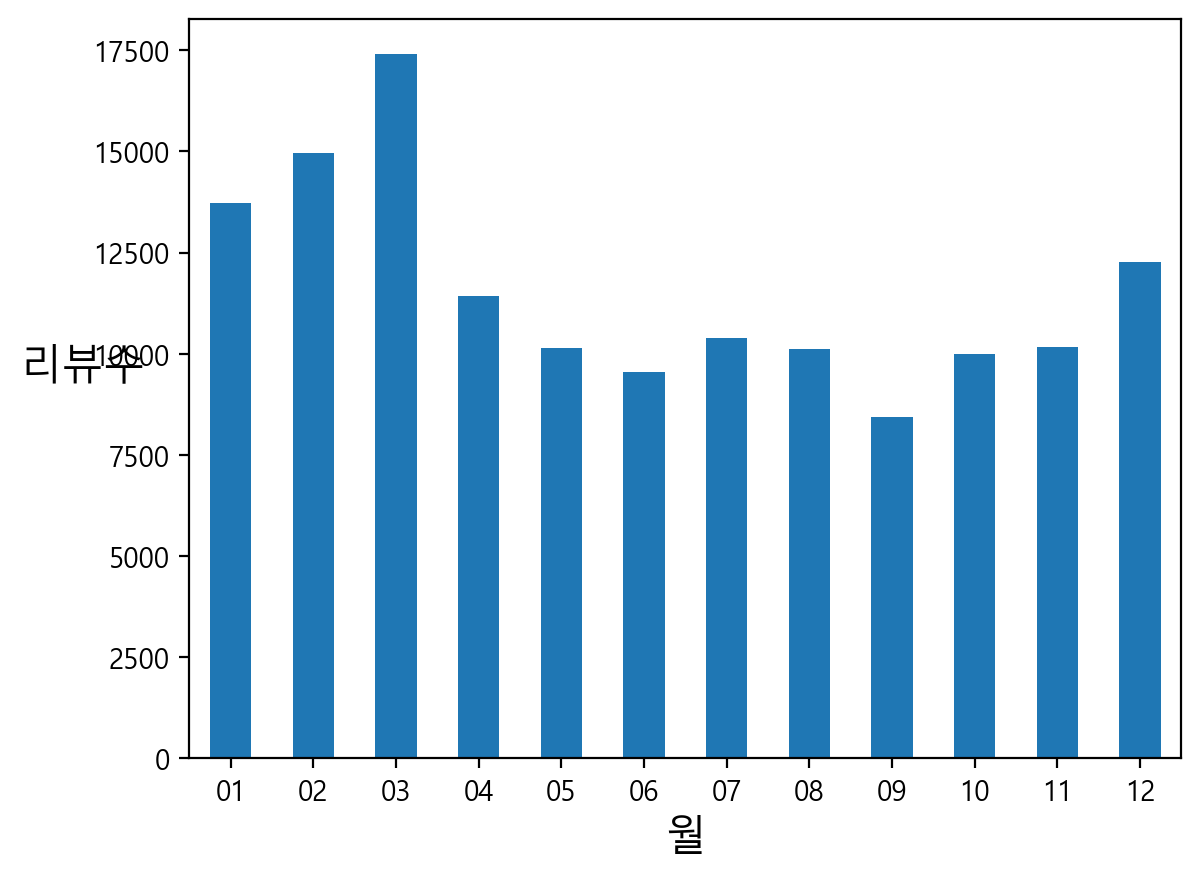

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.rc('font', family='Malgun Gothic')
import matplotlib_inline.backend_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('retina')

df_rvw['month'] = df_rvw['review_date'].apply(lambda x:x[3:5])
df_rvw['month'].value_counts().sort_index().plot.bar()

plt.xticks(rotation=0)
plt.xlabel('월', size=15)
plt.ylabel('리뷰수', size=15, rotation=0)

## 형태소 분석을 이용하여 리뷰에서 의도 찾기

In [12]:
from kiwipiepy import Kiwi

kiwi = Kiwi()

def find_nouns_verb_adject(text):
    """입력된 문장에서 명사, 동사 추출해 리스트로 반환"""
    tokens = kiwi.tokenize(text)

    target_idxs=[]
    target_words = []
    for idx, wrd in enumerate(tokens):
        if 'NN' in wrd.tag:
            if len(wrd.form) > 1:
                target_words.append(wrd.form)

                target_idxs.append('noun')
            elif wrd.tag.startswith("V"):
                tmp_form = wrd.form + "다"
                target_words.append(tmp_form)
                target_idxs.append('verb')
    return target_words, target_idxs

def find_intension_one_text(words, words_tag):
    """문장 내 의도를 나타내는 단어를 추출한다"""
    intensions = []
    for idx, tag in enumerate(words_tag):
        try:
            if tag == 'verb':
                word = "".join(words[idx-1:idx+1])
                intensions.append(word)
            elif (tag=='noun') and (words_tag[idx+1]!='verb'):
                intensions.append(words[idx])
        except:
            intensions.append(words[idx])
    return intensions

def find_intension(text):
    """입력된 문장에서 의도를 찾아서 반환한다"""
    target_words, target_idxs = find_nouns_verb_adject(text)
    intensions = find_intension_one_text(target_words, target_idxs)
    return " ".join(intensions)

sample_sent = '이번에 출시한 신제품은 촉촉하고 가벼워서 좋아요'
find_intension(sample_sent)

'이번 출시 제품'

In [13]:
df_rvw['리뷰_의도'] = df_rvw['reviews'].apply(lambda x:find_intension(x))
df_rvw.to_csv(review_path+'makeup_review_fin.csv', index = False)
df_rvw_1 = df_rvw.copy()
df_rvw_1.head(2)

,review_date,review_score,reviews,name,url,price,month,리뷰_의도
0,22.01.02.,평점4,빠른배송과 사은품 감사합니당,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",01,배송 사은품 감사
1,21.06.21.,평점5,블랙쿠션 그전꺼도 좋았는데 리뉴얼된것 역시나 넘넘 좋아용!,8_번제품,https://cr.shopping.naver.com/adcr.nhn?x=6%2Fb...,"28,500",06,블랙 쿠션 리뉴얼


### nGram으로 키워드 파악

In [14]:
def getGram(tokens, n):
    """분절된 단어를 전달하면 nGram을 반환"""
    bigrams = []
    for i in range(0, int(len(tokens))):
        tmp = tokens[i:i+n]
        if len(tmp) > 1:
            bigrams.append(tmp)

    ngram_result = pd.DataFrame(data={'nGram':bigrams})
    ngram_result['nGram'] = ngram_result['nGram'].apply(lambda x:" ".join(x))
    ngram_result = ngram_result['nGram'].value_counts().to_frame()
    ngram_result.reset_index(inplace=True)

    return ngram_result
tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

bigram_rvw = getGram(tokens=tokens, n=2)

display(bigram_rvw[:20])
display(bigram_rvw[20:40])
display(bigram_rvw[40:60])

,nGram,count
0,피부 표현,2752
1,커버 지속,1811
2,사용 제품,1699
3,커버 피부,1504
4,블랙 쿠션,1483
5,수정 화장,1437
6,커버 밀착,1435
7,쿠션 커버,1361
8,리필 구매,1318
9,쿠션 사용,1304


,nGram,count
20,가격 대비,1004
21,만족 커버,996
22,인생 쿠션,993
23,자연 커버,967
24,피부 커버,964
25,사용 커버,964
26,사용 구매,960
27,만족 사용,956
28,제품 사용,945
29,커버 마스크,918


,nGram,count
40,사용 쿠션,805
41,쿠션 피부,781
42,쿠션 쿠션,772
43,피부 밀착,768
44,구매 구매,765
45,지성 피부,752
46,구매 제품,747
47,자연 피부,707
48,지속 커버,690
49,만족 만족,686


In [20]:
def print_center_words(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

    rvws = [rvw for rvw in review_stpwrds if center_word in rvw]

    #앞뒤 n개 단어를 가져온다
    for rvw in rvws:
        rvw_split = rvw.split()
        for idx, token in enumerate(rvw_split):
            if center_word in token:
                front_part = " ".join(rvw_split[idx-n:idx])
                end_part = " ".join(rvw_split[idx+1:idx+n+1])
                joined_parts = front_part + " " + center_word + " " + end_part
                len_joined_parts = joined_parts.split()
                if len(len_joined_parts) == (n*2+1):
                    print("{0}'\x1b[1;31m{1}\x1b[0m'{2}".format(front_part, center_word, end_part))

print_center_words(center_word='좋다', dataframe=df_rvw_1, column_name='리뷰_의도', n=2)


제품 가성비'좋다'커버 수정


In [16]:
from collections import Counter

rvw_tokens = " ".join(df_rvw_1['리뷰_의도'].tolist()).split()

common_words = Counter(rvw_tokens).most_common()

common_words_dict = {common_words[i][0]:common_words[i][1] for i in range(len(common_words))}

common_words_dict

{'커버': 31268,
 '쿠션': 27472,
 '구매': 23532,
 '피부': 22200,
 '사용': 21562,
 '만족': 16688,
 '제품': 16344,
 '배송': 12671,
 '마스크': 11361,
 '밀착': 10290,
 '느낌': 7479,
 '지속': 7322,
 '화장': 7244,
 '자연': 6410,
 '생각': 6205,
 '케이스': 6063,
 '건조': 6031,
 '퍼프': 5813,
 '감사': 5398,
 '리필': 5269,
 '가격': 4965,
 '색상': 4823,
 '얼굴': 4708,
 '매트': 4682,
 '주문': 4614,
 '정도': 4371,
 '추천': 4211,
 '팩트': 3972,
 '사은품': 3924,
 '표현': 3801,
 '여름': 3692,
 '건성': 3577,
 '기대': 3523,
 '구입': 3428,
 '샘플': 3224,
 '수정': 3224,
 '마음': 2965,
 '선물': 2916,
 '처음': 2905,
 '시간': 2871,
 '성분': 2821,
 '발림': 2554,
 '최고': 2506,
 '모공': 2468,
 '상품': 2284,
 '후기': 2257,
 '블랙': 2109,
 '이번': 2084,
 '정착': 2082,
 '유지': 2073,
 '부분': 2041,
 '지성': 1966,
 '헤라': 1964,
 '컬러': 1948,
 '크림': 1924,
 '트러블': 1916,
 '겨울': 1892,
 '친구': 1818,
 '파우더': 1816,
 '기초': 1791,
 '포장': 1785,
 '엄마': 1764,
 '때문': 1710,
 '인생': 1642,
 '고민': 1561,
 '머리': 1557,
 '수분': 1541,
 '평소': 1512,
 '파운데이션': 1507,
 '기존': 1488,
 '요즘': 1462,
 '마무리': 1448,
 '필요': 1441,
 '잡티': 1419,
 '가성비': 1406,
 '디자인

In [17]:
def print_center_words_2(center_word, dataframe, column_name, n):
    """특정 단어를 중앙에 위치하고 앞뒤 단어 n개 출력"""
    dataframe[column_name] = dataframe[column_name].astype('str')

    #어절 길이가 1이면 삭제
    review_stpwrds = []
    for review in dataframe[column_name]:
        review_tokens = [token for token in review.split() if len(token) > 1]
        review_join = " ".join(review_tokens)
        review_stpwrds.append(review_join)

        rvws = [rvw for rvw in review_stpwrds if center_word in rvw]

        #앞뒤 n개 단어를 가져온다
        review_results = []
        for rvw in rvws:
            rvw_split = rvw.split()
            for idx, token in enumerate(rvw_split):
                if center_word in token:
                    front_part = " ".join(rvw_split[idx-n:idx])
                    end_part = " ".join(rvw_split[idx+1:idx+n+1])
                    joined_parts = front_part + " " + center_word + " " + end_part
                    len_joined_parts = joined_parts.split()
                    if len(len_joined_parts) == (n*2+1):
                        review_results.append(joined_parts)
        #어절 빈도를 계산한다.
        all_words_counts = []
        for result in review_results:
            count = 0
            for t in result.split():
                cnt = common_words_dict[t]

                count += cnt

                all_words_counts.append(count)

        df_count = pd.DataFrame(data={"특정단어_포함한_리뷰":review_results, "빈도":all_words_counts}).sort_values(by="빈도", ascending=False)

        return df_count

In [21]:
df_count = print_center_words_2(center_word="좋다", dataframe=df_rvw_1, column_name='리뷰_의도', n=4)
df_count[:10]

,특정단어_포함한_리뷰,빈도
